# BoomBikes Linear Regression Assignment
by Vladimir Nikonov

## Problem Statement:

A US bike-sharing provider ***BoomBikes*** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands.

### 1. Reading and understanding the data

In [1]:
# Suppressing warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries for reading and understanding the data - NumPy, Pandas, Matplotlib and Seaborn.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Reading the dataset, inspecting the head.

bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The target variable is the variable **cnt**.

In [4]:
# Looking at the shape of the dataframe.

bikes.shape

(730, 16)

The dataframe contains **730** rows and **16** columns.

In [5]:
# Looking at the info and the missing variables.

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No missing variables are present in the dataset.

The columns *casual*, *registered*, *instant* and *dteday* can be dropped as they are not features.

The column *atemp* can be dropped as it is almost the same as the *temp* column, just another representation of it.

In [6]:
# Dropping the columns.

bikes = bikes.drop(['casual', 'registered', 'instant', 'dteday', 'atemp'], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [7]:
# Inspecting the numeric variables with the .describe() method.

num_vars = ['temp', 'hum', 'windspeed', 'cnt']
bikes[num_vars].describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


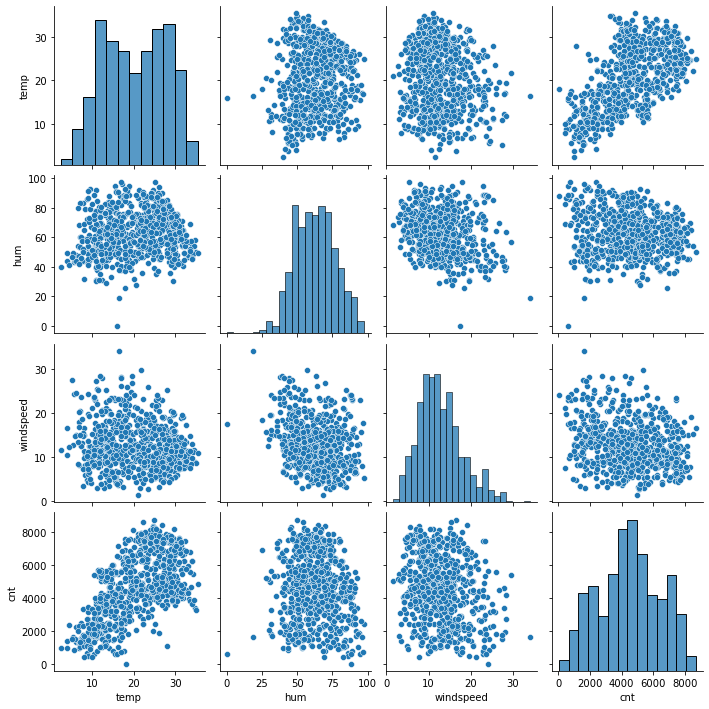

In [8]:
# Visualizing the numeric variables using the pairplot.

sns.pairplot(bikes[num_vars])
plt.show()

There is a strong correlation between the target variable and temperature (temp column).

In [9]:
# Mapping the categorical variables.

bikes['season'] = bikes['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bikes['mnth'] = bikes['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                  7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
bikes['weekday'] = bikes['weekday'].map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thur',
                                         5: 'Fri', 6: 'Sat', 0: 'Sun'})
bikes['weathersit'] = bikes['weathersit'].map({1: 'Clear', 2: 'Cloudy', 
                                               3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})

# Checking the values in the categorical columns.

print(bikes['season'].value_counts(), '\n')
print(bikes['mnth'].value_counts(), '\n')
print(bikes['weekday'].value_counts(), '\n')
print(bikes['weathersit'].value_counts())

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64 

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64 

Mon     105
Tue     105
Wed     104
Thur    104
Fri     104
Sat     104
Sun     104
Name: weekday, dtype: int64 

Clear              463
Cloudy             246
Light Rain/Snow     21
Name: weathersit, dtype: int64


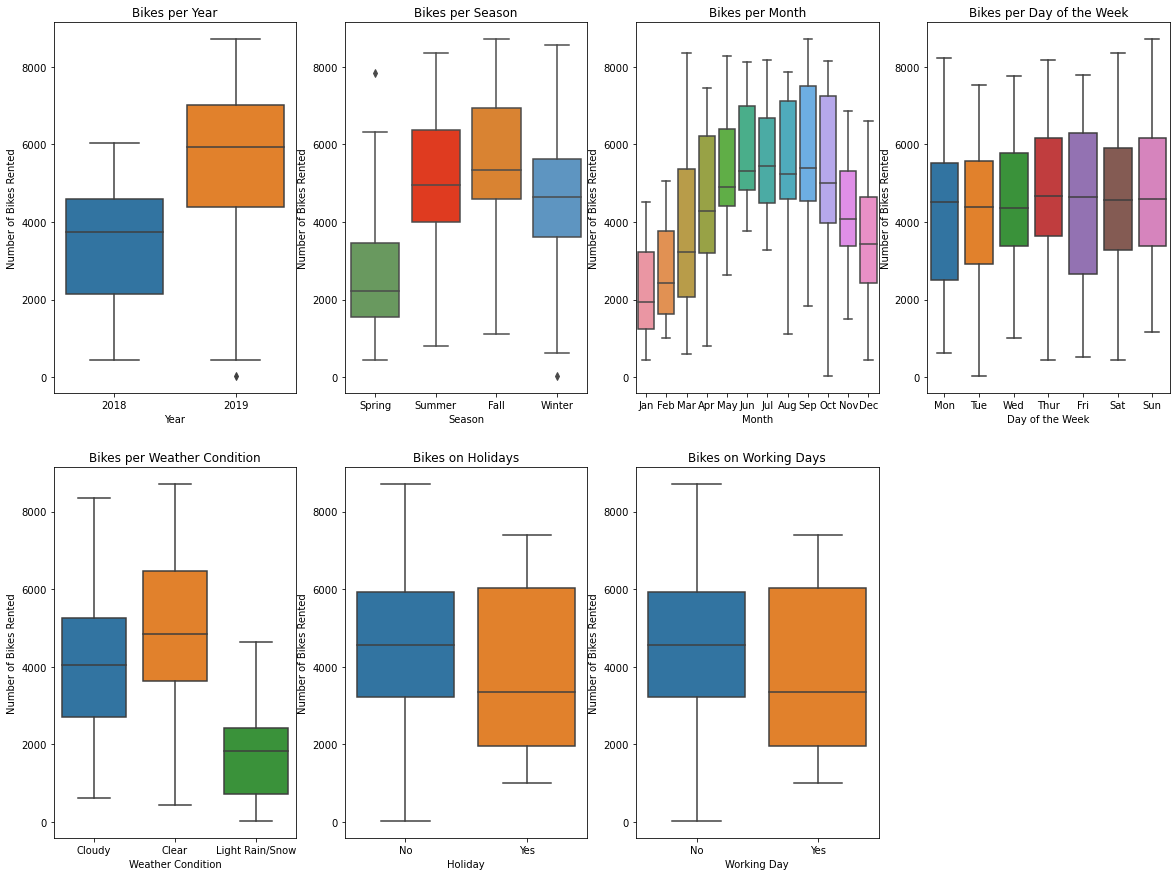

In [10]:
# Visualizing the categorical variables.

plt.figure(figsize=(20, 15))

plt.subplot(2, 4, 1)
year_plot = sns.boxplot(data=bikes, y='cnt', x='yr')
year_plot.set_title('Bikes per Year')
year_plot.set_xlabel('Year')
year_plot.set_ylabel('Number of Bikes Rented')
year_plot.set_xticklabels(['2018', '2019'])

plt.subplot(2, 4, 2)
season_plot = sns.boxplot(data=bikes, y='cnt', x='season', palette={'Spring': '#63a355', 'Summer': '#ff2400', 
                                                      'Fall': '#f58216', 'Winter': '#4e97d1'})
season_plot.set_title('Bikes per Season')
season_plot.set_xlabel('Season')
season_plot.set_ylabel('Number of Bikes Rented')

plt.subplot(2, 4, 3)
mnth_plot = sns.boxplot(data=bikes, y='cnt', x='mnth')
mnth_plot.set_title('Bikes per Month')
mnth_plot.set_xlabel('Month')
mnth_plot.set_ylabel('Number of Bikes Rented')

plt.subplot(2, 4, 4)
weekday_plot = sns.boxplot(data=bikes, y='cnt', x='weekday')
weekday_plot.set_title('Bikes per Day of the Week')
weekday_plot.set_xlabel('Day of the Week')
weekday_plot.set_ylabel('Number of Bikes Rented')

plt.subplot(2, 4, 5)
weather_plot = sns.boxplot(data=bikes, y='cnt', x='weathersit')
weather_plot.set_title('Bikes per Weather Condition')
weather_plot.set_xlabel('Weather Condition')
weather_plot.set_ylabel('Number of Bikes Rented')

plt.subplot(2, 4, 6)
holiday_plot = sns.boxplot(data=bikes, y='cnt', x='holiday')
holiday_plot.set_title('Bikes on Holidays')
holiday_plot.set_xlabel('Holiday')
holiday_plot.set_ylabel('Number of Bikes Rented')
holiday_plot.set_xticklabels(['No', 'Yes'])

plt.subplot(2, 4, 7)
working_plot = sns.boxplot(data=bikes, y='cnt', x='holiday')
working_plot.set_title('Bikes on Working Days')
working_plot.set_xlabel('Working Day')
working_plot.set_ylabel('Number of Bikes Rented')
working_plot.set_xticklabels(['No', 'Yes'])

plt.show()

1. More bikes were rented in 2019 than in 2018.
2. People tend to rent more bikes in Fall and in Summer.
3. Most bikes seem to be rented in September.
4. Sunday seems to be the busiest day according to the number of bikes rented.
5. People rent more bikes in Clear weather.
6. The number of rentals is higher when it's not a holiday.
7. People tend to rent more bikes on holidays and on weekends than on working days.

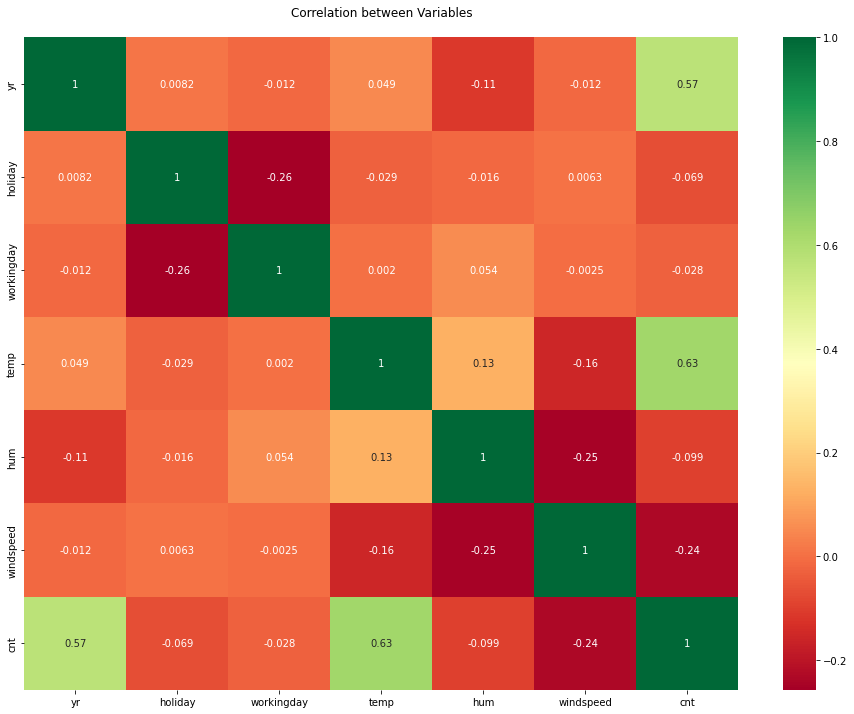

In [11]:
# Looking at the correlation matrix to decide if the linear regression model will fit the business goal.

plt.figure(figsize=(16, 12))
sns.heatmap(bikes.corr(), annot=True, cmap='RdYlGn').set(title='Correlation between Variables\n')
plt.show()

After looking at the correlation heatmap and the pairplot, we can say that the target variable - *cnt* - is strongly correlated with the variables *temp* and *yr*.

Some of these variables might turn out to be good predictors of the target variable.

Judging by the two plots, we can conclude that linear model will be a good way to predict the target variable.

### 2. Preparing the Data for Modeling

In [12]:
# Converting multi-level categorical variables to 1s and 0s. Creating dummy variables.

seasons = pd.get_dummies(bikes['season'], drop_first=True)
months = pd.get_dummies(bikes['mnth'], drop_first=True)
weekdays = pd.get_dummies(bikes['weekday'], drop_first=True)
weather = pd.get_dummies(bikes['weathersit'], drop_first=True)

print(seasons.head(), '\n')
print(months.head(), '\n')
print(weekdays.head(), '\n')
print(weather.head())

   Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0 

   Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0 

   Mon  Sat  Sun  Thur  Tue  Wed
0    1    0    0     0    0    0
1    0    0    0     0    1    0
2    0    0    0     0    0    1
3    0    0    0     1    0    0
4    0    0    0     0    0    0 

   Cloudy  Light Rain/Snow
0       1                0
1       1                0
2       0                0
3       0                0
4       0                0


In [13]:
# Concatinating the dummy dataframes with the original one 
# and dropping the categorical columns.

bikes = pd.concat([seasons, months, weekdays, weather, bikes], axis=1).drop(
    ['season', 'mnth', 'weekday', 'weathersit'], axis=1)
bikes.head()

,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Wed,Cloudy,Light Rain/Snow,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In order to split the df into train and test and rescale them, we need the SKLearn library.

In [14]:
# Importsing SKLearn.

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Splitting the dataframe into train and test.

train_bikes, test_bikes = train_test_split(bikes, train_size=0.7, random_state=100)
print(train_bikes.shape)
print(test_bikes.shape)

(510, 29)
(220, 29)


In [16]:
# Creating a scaler.

scaler = MinMaxScaler()


# Fitting the scaler on the train df.

train_bikes[num_vars] = scaler.fit_transform(train_bikes[num_vars])
train_bikes.head()

,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Wed,Cloudy,Light Rain/Snow,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [17]:
# Double-checking the rescaled features.

train_bikes[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


Everything seems to be in order.

Now it's time to build the model.

### 3. Training the Model

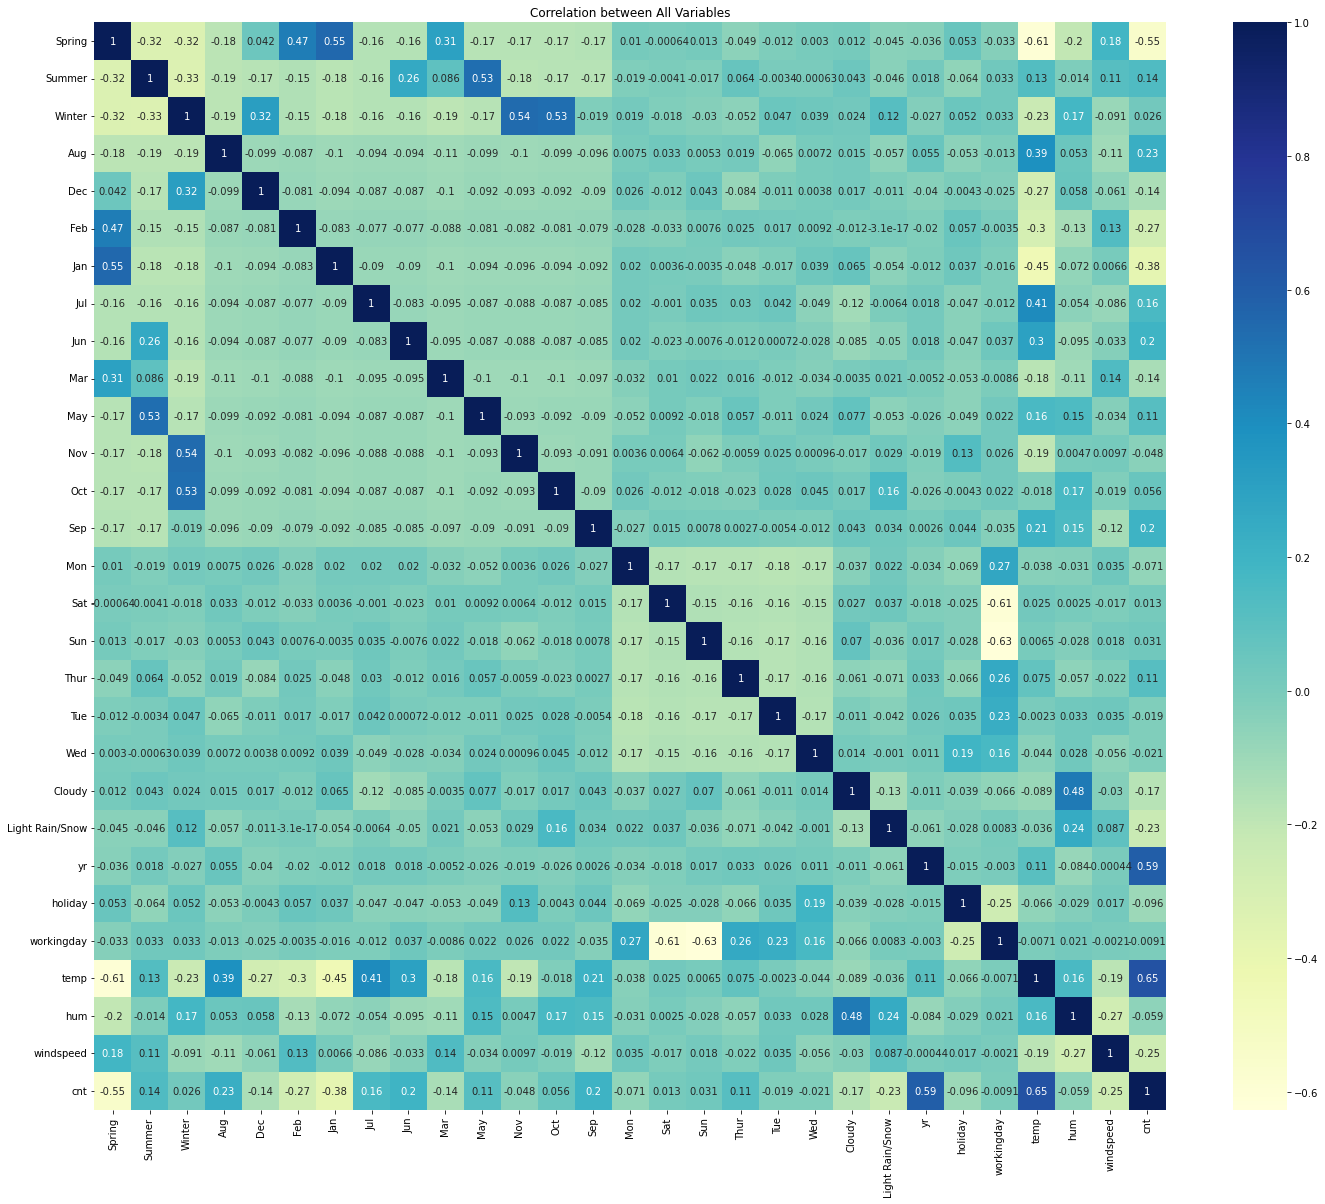

In [18]:
# Checking the correlation between all variables.

plt.figure(figsize=(24, 20))
sns.heatmap(train_bikes.corr(), annot=True, cmap='YlGnBu').set(title='Correlation between All Variables')
plt.show()

Judging by the correlation heatmap, the variables have the strongest correlation with the target variable are:
*temp*, *yr*, *Summer*, *Aug*, *Jul*, *Jun* and *Sep*.

In [19]:
# Creating X and y.

y_train = train_bikes.pop('cnt')
X_train = train_bikes

We'll be using the Reculsive Feature Ellimination (RFE) feature of the SKLearn library and then manually removing the insignificant variables.

In [20]:
# Importing RFE and LinearRegression.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
# Running RFE with 15 output variables.

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [22]:
# Displaying the selected variables and their significance.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thur', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Cloudy', True, 1),
 ('Light Rain/Snow', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [23]:
# Creating a variable with the 15 selected features and displaying them.

col = X_train.columns[rfe.support_]
col

Index(['Spring', 'Summer', 'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep',
       'Cloudy', 'Light Rain/Snow', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

The variables selected by the RFE are: *Spring', 'Summer', 'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy', 'Light Rain/Snow', 'yr', 'holiday', 'temp', 'hum* and *windspeed*.

In [24]:
# Creating X_test df with the RFE selected variables.

X_train_rfe = X_train[col]
X_train_rfe.head()

,Spring,Summer,Winter,Dec,Jan,Jul,Nov,Sep,Cloudy,Light Rain/Snow,yr,holiday,temp,hum,windspeed
576,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,1,0,1,0,0.442393,0.640189,0.255342
728,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,1,0,1,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,1,0,0,0,0.345824,0.751824,0.380981


In [25]:
# Importing Statsmodels for model building and descriptive summary.

import statsmodels.api as sm

In [26]:
# Adding a constant.

X_train_sm = sm.add_constant(X_train_rfe)

In [27]:
# Fitting the model and displaying the summary.

lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          8.15e-189
Time:                        03:12:43   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

None of the variables have the *p-value* higher than **0.05**, which means that all of the are indeed significant.

The *R-squared* is **0.845** and the *Adjusted R-squared* is **0.840** which are great indicators of a good model.

To make sure that there's no multicollinearity, we can check the *VIF*.

In [28]:
# Importing VIF from Statsmodels.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Creating and displaying the VIF dataframe.

vif = pd.DataFrame()
vif['Columns'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Columns,VIF
13,hum,30.89
12,temp,17.79
14,windspeed,4.72
0,Spring,4.37
2,Winter,4.06
1,Summer,2.82
8,Cloudy,2.32
10,yr,2.09
6,Nov,1.85
4,Jan,1.75


As we can see, the variables *hum* and *temp* have high VIF values of **30.89** and **17.79** respectively.

Let us drop the *hum* column and see how it will affect the VIF of the other variables.

In [30]:
# Dropping the 'hum' column.

X_train_rfe = X_train_rfe.drop('hum', axis=1)
X_train_rfe.head()

,Spring,Summer,Winter,Dec,Jan,Jul,Nov,Sep,Cloudy,Light Rain/Snow,yr,holiday,temp,windspeed
576,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.264686
426,1,0,0,0,0,0,0,0,1,0,1,0,0.442393,0.255342
728,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.663106
482,0,1,0,0,0,0,0,0,1,0,1,0,0.395666,0.188475
111,0,1,0,0,0,0,0,0,1,0,0,0,0.345824,0.380981


In [31]:
# Building a model without the hum variable.


# Adding a constant.

X_train_sm = sm.add_constant(X_train_rfe)


# Fitting the model and displaying the summary.

lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          4.75e-186
Time:                        03:12:43   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032     

After dropping the *hum* column, the R-squared and the Adjusted R-squared dropped to **0.844** and **0.840** respectively. It is an insignificant drop and they are still great values.

Let us check the *VIF*.

In [32]:
# Creating and displaying the VIF dataframe.

vif = pd.DataFrame()
vif['Columns'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Columns,VIF
12,temp,5.17
13,windspeed,4.67
2,Winter,2.95
0,Spring,2.89
1,Summer,2.24
10,yr,2.07
6,Nov,1.81
4,Jan,1.66
5,Jul,1.59
8,Cloudy,1.57


The variable *temp* has the VIF value of **5.17**, which is higher than the norm.

However, judging by the p-value and based on logic, we can assume that it is very important in the context of bike renting business. 

Instead of removing it, we can try and drop the variable with the highest p-value - thich is Summer (**0.025**) and see, how it will affect multicollinearity.

In [33]:
# Dropping the 'Summer' column.

X_train_rfe = X_train_rfe.drop('Summer', axis=1)
X_train_rfe.head()

,Spring,Winter,Dec,Jan,Jul,Nov,Sep,Cloudy,Light Rain/Snow,yr,holiday,temp,windspeed
576,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.264686
426,1,0,0,0,0,0,0,1,0,1,0,0.442393,0.255342
728,1,0,1,0,0,0,0,0,0,1,0,0.245101,0.663106
482,0,0,0,0,0,0,0,1,0,1,0,0.395666,0.188475
111,0,0,0,0,0,0,0,1,0,0,0,0.345824,0.380981


In [34]:
# Building a model without the 'Summer' variable.


# Adding a constant.

X_train_sm = sm.add_constant(X_train_rfe)


# Fitting the model and displaying the summary.

lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          4.08e-186
Time:                        03:12:43   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2899      0.025     

The R-squared and the Adj. R-squared dropped very insignificantly.

Let us check the VIF.

In [35]:
# Creating and displaying the VIF dataframe.

vif = pd.DataFrame()
vif['Columns'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Columns,VIF
11,temp,4.67
12,windspeed,4.05
1,Winter,2.55
0,Spring,2.36
9,yr,2.06
5,Nov,1.81
3,Jan,1.65
7,Cloudy,1.54
2,Dec,1.46
4,Jul,1.36


All the VIF values are now lower than **5**.

The p-values of most variables are now **0.000**.

In order to make our model simpler, let us drop the *Nov* column with the p-value **0.014**.

In [36]:
# Dropping the 'Nov' column.

X_train_rfe = X_train_rfe.drop('Nov', axis=1)
X_train_rfe.head()

,Spring,Winter,Dec,Jan,Jul,Sep,Cloudy,Light Rain/Snow,yr,holiday,temp,windspeed
576,0,0,0,0,1,0,0,0,1,0,0.815169,0.264686
426,1,0,0,0,0,0,1,0,1,0,0.442393,0.255342
728,1,0,1,0,0,0,0,0,1,0,0.245101,0.663106
482,0,0,0,0,0,0,1,0,1,0,0.395666,0.188475
111,0,0,0,0,0,0,1,0,0,0,0.345824,0.380981


In [37]:
# Building a model without the 'Nov' variable.


# Adding a constant.

X_train_sm = sm.add_constant(X_train_rfe)


# Fitting the model and displaying the summary.

lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          5.72e-186
Time:                        03:12:43   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2780      0.025     

In [38]:
# Creating and displaying the VIF dataframe.

vif = pd.DataFrame()
vif['Columns'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Columns,VIF
10,temp,4.63
11,windspeed,4.01
0,Spring,2.36
8,yr,2.06
1,Winter,1.64
3,Jan,1.64
6,Cloudy,1.54
4,Jul,1.36
2,Dec,1.29
5,Sep,1.20


As the R-squared value is still pretty high, we can drop another variable in order to simplify the model.

In [39]:
# Dropping the 'Dec' variable.

X_train_rfe = X_train_rfe.drop('Dec', axis=1)
X_train_rfe.head()

,Spring,Winter,Jan,Jul,Sep,Cloudy,Light Rain/Snow,yr,holiday,temp,windspeed
576,0,0,0,1,0,0,0,1,0,0.815169,0.264686
426,1,0,0,0,0,1,0,1,0,0.442393,0.255342
728,1,0,0,0,0,0,0,1,0,0.245101,0.663106
482,0,0,0,0,0,1,0,1,0,0.395666,0.188475
111,0,0,0,0,0,1,0,0,0,0.345824,0.380981


In [40]:
# Building a model without the 'Dec' variable.


# Adding a constant.

X_train_sm = sm.add_constant(X_train_rfe)


# Fitting the model and displaying the summary.

lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          2.87e-186
Time:                        03:12:43   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2671      0.025     

In [41]:
# Creating and displaying the VIF dataframe.

vif = pd.DataFrame()
vif['Columns'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Columns,VIF
9,temp,4.63
10,windspeed,4.01
0,Spring,2.24
7,yr,2.06
2,Jan,1.60
5,Cloudy,1.53
1,Winter,1.39
3,Jul,1.36
4,Sep,1.20
6,Light Rain/Snow,1.08


Let us drop another one and see how it affects the R-squared.

In [42]:
# Dropping the 'Jan' variable.

X_train_rfe = X_train_rfe.drop('Jan', axis=1)
X_train_rfe.head()

,Spring,Winter,Jul,Sep,Cloudy,Light Rain/Snow,yr,holiday,temp,windspeed
576,0,0,1,0,0,0,1,0,0.815169,0.264686
426,1,0,0,0,1,0,1,0,0.442393,0.255342
728,1,0,0,0,0,0,1,0,0.245101,0.663106
482,0,0,0,0,1,0,1,0,0.395666,0.188475
111,0,0,0,0,1,0,0,0,0.345824,0.380981


In [43]:
# Building a model without the 'Jan' variable.


# Adding a constant.

X_train_sm = sm.add_constant(X_train_rfe)


# Fitting the model and displaying the summary.

lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          3.10e-186
Time:                        03:12:43   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2531      0.024     

In [44]:
# Creating and displaying the VIF dataframe.

vif = pd.DataFrame()
vif['Columns'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Columns,VIF
8,temp,4.61
9,windspeed,4.00
6,yr,2.06
0,Spring,1.64
4,Cloudy,1.52
1,Winter,1.39
2,Jul,1.35
3,Sep,1.20
5,Light Rain/Snow,1.08
7,holiday,1.04


We ended up with the model, where the *R-squared* is **0.832**, the *Adj. R-squared* is **0.829** and all the p-values are at **0.000**.

We are able to explain **83.2%** of the variance of the target variable.

Let us move on to the Residual Analysis.

### 4. Residual Analysis

In [45]:
# Getting the predicted y values.

y_train_pred = lm.predict(X_train_sm)

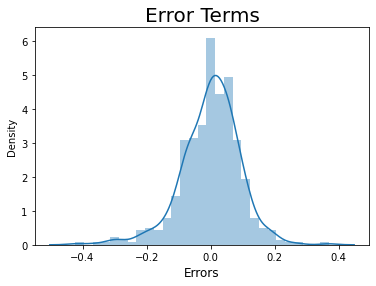

In [46]:
# Plotting the distribution of the residuals.

sns.distplot(y_train-y_train_pred)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=12)
plt.show()

The distribution looks like a normal distribution with the center at around 0, which matches the Linear Regression Assumptions.

Now we can get to testing the model.

### 5. Testing the Model and Making Predictions

In [47]:
# Rescaling the test set.

test_bikes[num_vars] = scaler.transform(test_bikes[num_vars])
test_bikes.head()

,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Wed,Cloudy,Light Rain/Snow,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [48]:
# Dividing the test set into X_test and y_test.

y_test = test_bikes.pop('cnt')
X_test = test_bikes

In [49]:
# Dropping the insignificant variables.

X_test_sm = X_test[X_train_rfe.columns]


# Adding a constant.

X_test_sm = sm.add_constant(X_test_sm)

In [50]:
# Making predictions.

y_test_pred = lm.predict(X_test_sm)

### 6. Evaluating the Model

To evaluate the model, we will use r2_score from the SKLearn library.

In [51]:
# Importing r2_score.

from sklearn.metrics import r2_score

In [52]:
# Evaluating the model.

r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test

0.8074869048294193

The final *R-Squared* of the training set is **0.832**, and the *R-Squared* of the test set is **~0.807**.

Let us compute the *Adjusted R-squared* for the test set.

Adj. R-squared = **1-(1-R2)*(n-1)/(n-p-1)**

(**n** - number of records, **p** - number of independent variables)

In [53]:
adj_r2_test = 1-(1-r2_test)*(test_bikes.shape[0]-1)/(test_bikes.shape[0]-1-X_train_rfe.shape[1])
adj_r2_test

0.7982757519504442

The *Adjusted R-squared* of the training set is **0.829** and the *Adjusted R-squared* of the test set is **~0.798**, which means we were able to explain **~79.8%** of the variance in the test data.

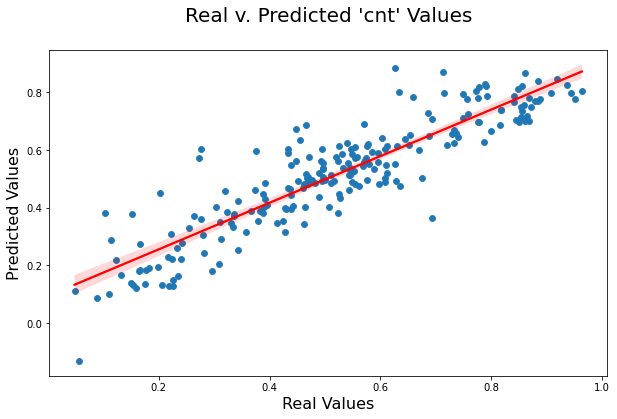

In [54]:
# Plotting y_test and y_test_pred to understand the spread.

plt.figure(figsize=(10, 6))
sns.scatterplot(y_test, y_test_pred)
sns.regplot(y_test, y_test_pred, line_kws={'color': 'red'})
plt.title("Real v. Predicted 'cnt' Values\n", fontsize=20)
plt.xlabel('Real Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.show()

<font size=5>***The final equation for the model:***</font>

<font size=4>**cnt** = `0.2531` + `0.4498` x *temp* - `0.2855` x *Light Rain/Snow* + `0.2342` x *yr* - `0.1395` x *windspeed* - `0.1123` x *Spring* - `0.0980` `x` *holiday* - `0.0796` `x` *Cloudy* - `0.0729` `x` *Jul* + `0.0573` `x` *Sep* + `0.0449` x *Winter*</font>

    
<font size=5>***The final values of the model:***</font>
    
<font size=4>**Train Set R-squared:** 0.832</font>
    
<font size=4>**Test Set R-squared:** 0.807</font>
    
<font size=4>**Train Set Adj. R-squared:** 0.829</font>
    
<font size=4>**Test Set Adj. R-squared:** 0.798</font>
